In [99]:
import os
import  matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import show_hist # Useful if you wish to plot all hist and GPS target image
from rasterio.mask import mask
from shapely.geometry.point import Point
import shapely
import numpy as np
import csv
import fiona
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats 

from tools_AA_IR import reading_gps_file, circle_sensor, plottingtemp_single_label_IR
from tools_AA_IR import path_IR, get_tif,get_value_IR 
from tools_AA_IR import circle_to_shape, readingIR , IR_mask, readingIR_all
from tools_AA import readingtemp_AA, slice_raw, path_sonde, name_sonde, plottingtemp_single_label
from tools_EL import readingtemp, plottingtemp
from tools_AA_VIS import readingVIS,VIS_mask , norm, requested_VIS_AOI,norm_tif,get_requested_tif,hsv
from tools_AA_VIS import hsv_tif,hsv, requested_VIS_AOI_Random
import skgstat as skg

## HSV 

In [3]:
request_sensor = ["C1","C2","C3-AIR","C4","C5","C6","C7","C8","C9","C10"]
filetif = ['.tif']
filetif_hsv,requested_path = hsv_tif(filetif)

requested_names_hsv, requested_shapes_hsv, ls_mask_image_hsv, ls_out_transform_hsv,Piren_VIS_hsv,cible_coord = requested_VIS_AOI_Random(filetif_hsv,request_sensor,2)

./traitement_PIREN/vis_piren_phase_HSV.tif
['./traitement_PIREN/vis_piren_phase_HSV.tif']
nombre de shapes 10


In [14]:
ls = list(Piren_VIS_hsv.loc["Limits"][0])

In [17]:
import random
n = random.random(ls[0],ls[1])
print(n)

TypeError: random() takes no arguments (2 given)

In [19]:
skg.Variogram

skgstat.Variogram.Variogram

In [31]:
aa = Piren_VIS_hsv.loc["VIS_src"][0]

In [75]:
print("height :",aa.height)
print("width :",aa.width)
print("resolution :",aa.res)
print("limites",aa.bounds)


height : 7790
width : 6287
resolution : (0.039665999999996815, 0.03966599999997521)
limites BoundingBox(left=523552.2443436172, bottom=5366084.89130523, right=523801.62448561715, top=5366393.889445229)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [111]:
aa.read(1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [142]:
# Set an Coordinate array of shape(m,n)

coords = np.random.randint(0, 500, (300, 2))
coords.shape

(300, 2)

In [57]:
test_coord_x = np.linspace(aa.bounds[0],aa.bounds[2],num=aa.width)
a = test_coord_x[1]-test_coord_x[0]
print(a)
print(aa.res[0])

0.039672310231253505
0.039665999999996815


In [147]:
coord_x = np.linspace(aa.bounds[0],aa.bounds[2],num=aa.width)
coord_y = np.linspace(aa.bounds[1],aa.bounds[3],num=aa.width)
coord   = np.array([coord_y,coord_x],dtype=object)
coord.shape

(2, 6287)

In [148]:
np.array(list(zip(coord_x, coord_y))).shape

(6287, 2)

In [152]:

skg.Variogram([np.array(list(zip(coord_x, coord_y)))],values)

ValueError: The length of the values array has to matchthe length of coordinates

In [122]:
values.shape
coord[0].shape

(7790,)

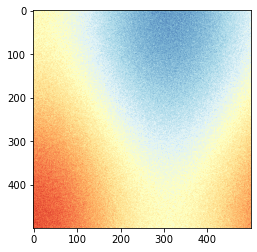

In [125]:
# apply the function to a meshgrid and add noise
xx, yy = np.mgrid[0:0.5 * np.pi:500j, 0:0.8 * np.pi:500j]
np.random.seed(42)
# generate a regular field
_field = np.sin(xx)**2 + np.cos(yy)**2 + 10
# add noise
np.random.seed(42)
z = _field + np.random.normal(0, 0.15, (500,  500))
plt.imshow(z, cmap='RdYlBu_r')

In [141]:
np.random.seed(42)
coords = np.random.randint(0, 500, (300, 2))
value = np.fromiter((z[c[0], c[1]] for c in coords), dtype=float)
value.shape

(300,)